# Read and analyse the drought indices 

* **Compatibility:** We need to install the netCDF4 package to work with the dataset.
* **Products used:** [UniSQ Drought Monitor Data](https://eprints.usq.edu.au/48151/) were stored in netcdf files. Each netcdf file stores data for each monitoring timescale ranging in 1, 3, 6, 9, 12 ,24, 36 months.

## Background

Drought is one of the most severe natural disasters Australia faces, inflicting serious impacts on the agricultural industry. An Australia-wide drought monitor was developed to provide detailed and timely data regarding drought conditions that will aid producers and policy makers alike. The Australian Drought Monitor applies the benefits of multi-index drought monitoring techniques to the whole of Australia, combining the most drought-relevant data into a single idex called Combined Drought Index (CDI) for each time scale from 1 month to 36 months. We are interested in how the Combined Drought Indices can represent the realisitc drought conditions at locations, supporting farm managers in their management decisions and policy makers in drought relief policies.

## Description

This notebook demonstrates how to access and analyse the data, data plotting and mapping. The drought conditions were categorised based on percentile rank values of the Austalian Combined Drought Indicator (CDI), given in below table

| Value | Category|
| --- | --- | 
| < 0.02 | Exceptional Drought |
| 0.02-0.05 | Extreme Drought |
| 0.05-0.1 | Severe Drought |
| 0.1-0.2 | Moderate Drought |
| 0.2-0.3 | Slightly Dry |
| 0.3-0.7 | Near Normal |
| 0.7-0.8 | Slightly Wet |
| 0.8-0.9 | Moderate Wet |
| 0.9-0.95 |Severe Wet |
| 0.95-0.98 | Extreme Wet |
| > 0.98 | Exceptional Wet |


## Getting started

Refresh the server to see changes in the CernVM-FS repository and then list all the files in the storage. We also need to load all modules needed for this notebook.

###  Refresh the server 

In [1]:
# Not connected to CVMFS at this time, so commenting this cell!
# !sudo cvmfs_config reload netcdftest.usq

### List the files 

In [1]:
#!ls /cvmfs/netcdftest.usq
!ls /srv/cvmfs/agrefedst0.usq.edu.au

cdi_12.nc  cdi_1.nc  cdi_24.nc	cdi_36.nc  cdi_3.nc  cdi_6.nc  cdi_9.nc


### Load modules

In [2]:
import netCDF4
from netCDF4 import num2date, date2num, date2index  # To deal with time variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt               # Python standard library datetime module

### Specify the file and its path

In [3]:
#file2read_1 = '/cvmfs/netcdftest.usq/cdi_1.nc'
file2read_1 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_1.nc'
#file2read_2 = '/cvmfs/netcdftest.usq/cdi_3.nc'
file2read_2 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_3.nc'
#file2read_3 = '/cvmfs/netcdftest.usq/cdi_6.nc'
file2read_3 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_6.nc'
#file2read_4 = '/cvmfs/netcdftest.usq/cdi_9.nc'
file2read_4 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_9.nc'
#file2read_5 = '/cvmfs/netcdftest.usq/cdi_12.nc'
file2read_5 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_12.nc'
file2read_6 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_24.nc'
file2read_7 = '/srv/cvmfs/agrefedst0.usq.edu.au/cdi_36.nc'

### Load the file into a variables using the netCDF4 library 

In [4]:
cdi_1 = netCDF4.Dataset(file2read_1)
cdi_3 = netCDF4.Dataset(file2read_2)
cdi_6 = netCDF4.Dataset(file2read_3)
cdi_9 = netCDF4.Dataset(file2read_4)
cdi_12 = netCDF4.Dataset(file2read_5)
cdi_24 = netCDF4.Dataset(file2read_6)
cdi_36 = netCDF4.Dataset(file2read_7)

In [5]:
# We can print the variables to see metadata
print(cdi_1)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    disclaimer: 1. The user accepts all responsibility and risks associated with the use of this data.
2. The Queensland Government makes no representations or warranties in relation to this data, and, you agree that to the extent
permitted by law, all warranties relating to accuracy, reliability, completeness, currency or suitability for any
particular purpose and all liability for any loss, damage or costs (including consequential damage) incurred in any
way (including but not limited to that arising from negligence) in connection with any use of or reliance on this
data are excluded or limited.
3. You agree to continually indemnify the State of Queensland (and its officers and employees) against
any loss, cost, expense, damage and liability of any kind (including liability in negligence) caused by your use of
this data or any product made from this data.

    reference: Jeffrey, S.J., Carter, J.O.,

In [6]:
# We can also print all variable keys (names) in the file
print(cdi_1.variables.keys())
print(cdi_3.variables.keys())
print(cdi_6.variables.keys())
print(cdi_9.variables.keys())
print(cdi_12.variables.keys())

dict_keys(['time', 'latitude', 'longitude', 'cdi'])
dict_keys(['time', 'latitude', 'longitude', 'cdi'])
dict_keys(['time', 'latitude', 'longitude', 'cdi'])
dict_keys(['time', 'latitude', 'longitude', 'cdi'])
dict_keys(['time', 'latitude', 'longitude', 'cdi'])


In [7]:
# Print all dimensions to see their sizes, one per line
for dims in cdi_1.dimensions.items():
    print(dims)

# We can also access each dimension of a variable
#mcdi = cdi_1.variables['cdi']
#timedim = mcdi.dimensions[2]
#print(timedim)

('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 291)
('latitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 681)
('longitude', <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 841)


In [8]:
# Print all attributes of each variable
print(cdi_1.variables.items())

dict_items([('time', <class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    units: days since 1998-04-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: time
current shape = (291,)
filling on, default _FillValue of -9223372036854775806 used), ('latitude', <class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (681,)
filling on), ('longitude', <class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (841,)
filling on), ('cdi', <class 'netCDF4._netCDF4.Variable'>
float64 cdi(latitude, longitude, time)
    _FillValue: nan
unlimited dimensions: time
current shape = (681, 841, 291)
filling on)])


In [9]:
# We can also individually access each variable
lats = cdi_1.variables['latitude']
print(lats)
print(lats[:])


<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (681,)
filling on
[-44.   -43.95 -43.9  -43.85 -43.8  -43.75 -43.7  -43.65 -43.6  -43.55
 -43.5  -43.45 -43.4  -43.35 -43.3  -43.25 -43.2  -43.15 -43.1  -43.05
 -43.   -42.95 -42.9  -42.85 -42.8  -42.75 -42.7  -42.65 -42.6  -42.55
 -42.5  -42.45 -42.4  -42.35 -42.3  -42.25 -42.2  -42.15 -42.1  -42.05
 -42.   -41.95 -41.9  -41.85 -41.8  -41.75 -41.7  -41.65 -41.6  -41.55
 -41.5  -41.45 -41.4  -41.35 -41.3  -41.25 -41.2  -41.15 -41.1  -41.05
 -41.   -40.95 -40.9  -40.85 -40.8  -40.75 -40.7  -40.65 -40.6  -40.55
 -40.5  -40.45 -40.4  -40.35 -40.3  -40.25 -40.2  -40.15 -40.1  -40.05
 -40.   -39.95 -39.9  -39.85 -39.8  -39.75 -39.7  -39.65 -39.6  -39.55
 -39.5  -39.45 -39.4  -39.35 -39.3  -39.25 -39.2  -39.15 -39.1  -39.05
 -39.   -38.95 -38.9  -38.85 -38.8  -38.75 -38.7  -38.65 -38.6  -38.55
 -38.5  -38.45 -38.4  -38.35 -38.3  -38.25 -38.2  -38.

In [10]:
# lons = cdi_1.variables['longitude'][:]
lons = cdi_1.variables['longitude']
print(lons)
print(lons[:])

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (841,)
filling on
[112.   112.05 112.1  112.15 112.2  112.25 112.3  112.35 112.4  112.45
 112.5  112.55 112.6  112.65 112.7  112.75 112.8  112.85 112.9  112.95
 113.   113.05 113.1  113.15 113.2  113.25 113.3  113.35 113.4  113.45
 113.5  113.55 113.6  113.65 113.7  113.75 113.8  113.85 113.9  113.95
 114.   114.05 114.1  114.15 114.2  114.25 114.3  114.35 114.4  114.45
 114.5  114.55 114.6  114.65 114.7  114.75 114.8  114.85 114.9  114.95
 115.   115.05 115.1  115.15 115.2  115.25 115.3  115.35 115.4  115.45
 115.5  115.55 115.6  115.65 115.7  115.75 115.8  115.85 115.9  115.95
 116.   116.05 116.1  116.15 116.2  116.25 116.3  116.35 116.4  116.45
 116.5  116.55 116.6  116.65 116.7  116.75 116.8  116.85 116.9  116.95
 117.   117.05 117.1  117.15 117.2  117.25 117.3  117.35 117.4  117.45
 117.5  117.55 117.6  117.65 117.7  117.75 117.8  117

In [11]:
# time = cdi_1.variables['time'][:]
times_1 = cdi_1.variables['time']
times_3 = cdi_3.variables['time']
times_6 = cdi_6.variables['time']
times_9 = cdi_9.variables['time']
times_12 = cdi_12.variables['time']
# See the time variable
#print(times_1)
#print(times_1[:])
print('units = %s, \nvalues = %s' % (times_1.units, times_1[:]))

units = days since 1998-04-01 00:00:00, 
values = [   0   30   61   91  122  153  183  214  244  275  306  334  365  395
  426  456  487  518  548  579  609  640  671  700  731  761  792  822
  853  884  914  945  975 1006 1037 1065 1096 1126 1157 1187 1218 1249
 1279 1310 1340 1371 1402 1430 1461 1491 1522 1552 1583 1614 1644 1675
 1705 1736 1767 1795 1826 1856 1887 1917 1948 1979 2009 2040 2070 2101
 2132 2161 2192 2222 2253 2283 2314 2345 2375 2406 2436 2467 2498 2526
 2557 2587 2618 2648 2679 2710 2740 2771 2801 2832 2863 2891 2922 2952
 2983 3013 3044 3075 3105 3136 3166 3197 3228 3256 3287 3317 3348 3378
 3409 3440 3470 3501 3531 3562 3593 3622 3653 3683 3714 3744 3775 3806
 3836 3867 3897 3928 3959 3987 4018 4048 4079 4109 4140 4171 4201 4232
 4262 4293 4324 4352 4383 4413 4444 4474 4505 4536 4566 4597 4627 4658
 4689 4717 4748 4778 4809 4839 4870 4901 4931 4962 4992 5023 5054 5083
 5114 5144 5175 5205 5236 5267 5297 5328 5358 5389 5420 5448 5479 5509
 5540 5570 5601 5632 5662 5

In [12]:
# See the time series
dates = num2date(times_1[:], times_1.units)
#print([date.strftime('%Y-%m-%d') for date in dates[:10]])
print([date.strftime('%Y-%m-%d') for date in dates])

['1998-04-01', '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01', '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01', '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01', '1999-09-01', '1999-10-01', '1999-11-01', '1999-12-01', '2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01', '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01', '2004-01-01', '2004-02-01', '2004

In [13]:
# Know the latest month
time_of_data = [date.strftime("%Y-%m-%d") for date in dates]
time_of_data[-1] 

'2022-12-01'

### Mapping

In [14]:
data1 = cdi_1.variables['cdi'][:, :, times_1.size - 1]
data2 = cdi_3.variables['cdi'][:, :, times_3.size - 1]
data3 = cdi_6.variables['cdi'][:, :, times_6.size - 1]
data4 = cdi_9.variables['cdi'][:, :, times_9.size - 1]
data5 = cdi_12.variables['cdi'][:, :, times_12.size - 1]

In [15]:
print(cdi_1.variables['cdi'])
print(lons[0:841:200])

<class 'netCDF4._netCDF4.Variable'>
float64 cdi(latitude, longitude, time)
    _FillValue: nan
unlimited dimensions: time
current shape = (681, 841, 291)
filling on
[112. 122. 132. 142. 152.]


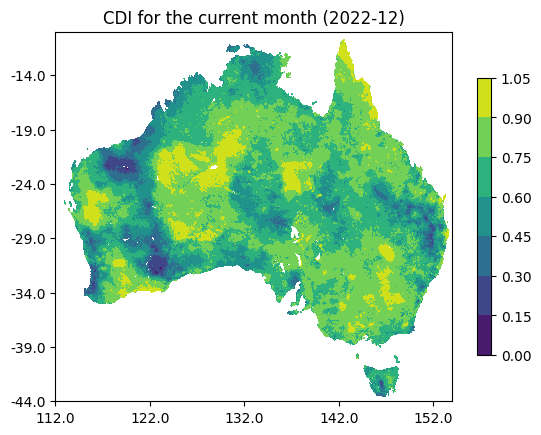

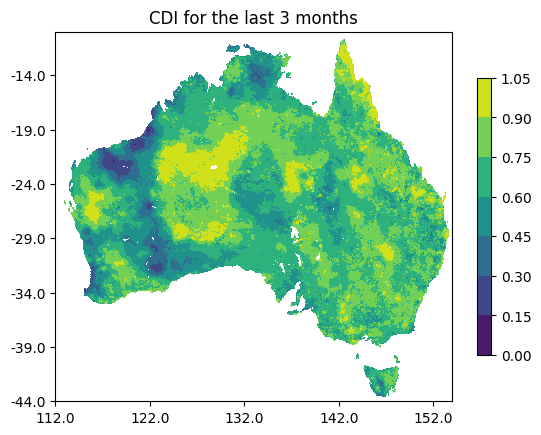

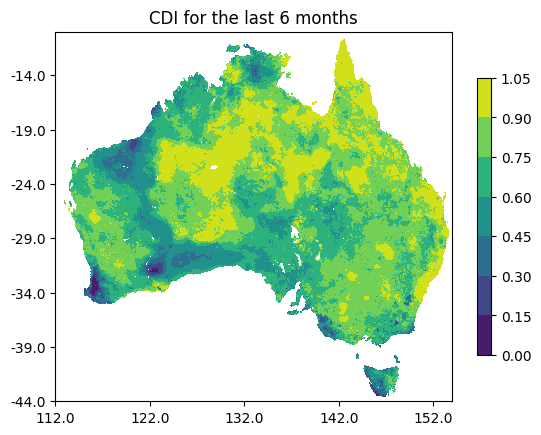

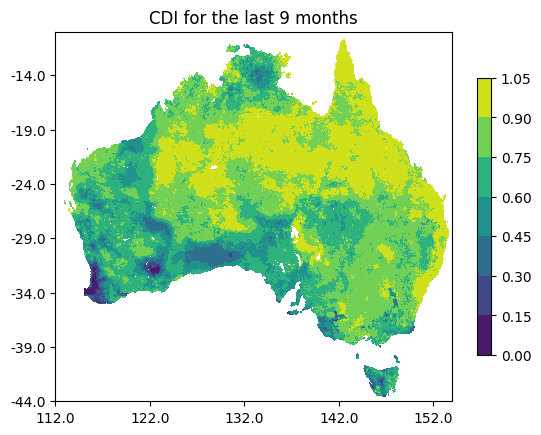

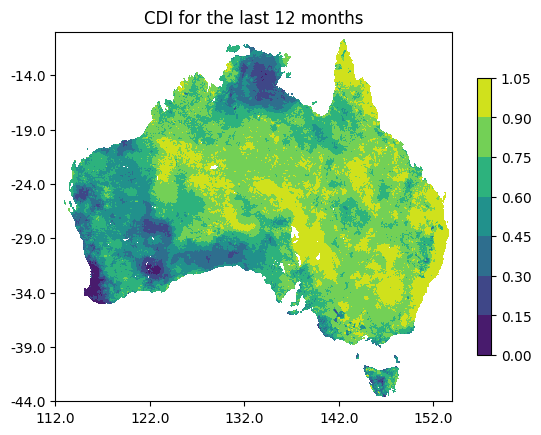

In [16]:
m1 = plt.contourf(data1)
cbar1 = plt.colorbar(m1, orientation='vertical', shrink=0.75)
plt.xticks(np.arange(0,841,200), lons[0:841:200])
plt.yticks(np.arange(0,681,100), lats[0:681:100])
plt.title("CDI for the current month" + " (" +time_of_data[-1][0:7]+ ")") 
plt.show()
#
m2 = plt.contourf(data2)
cbar2 = plt.colorbar(m2, orientation='vertical', shrink=0.75)
plt.xticks(np.arange(0,841,200), lons[0:841:200])
plt.yticks(np.arange(0,681,100), lats[0:681:100])
plt.title("CDI for the last 3 months") 
plt.show()
#
m3 = plt.contourf(data3)
cbar3 = plt.colorbar(m3, orientation='vertical', shrink=0.75)
plt.xticks(np.arange(0,841,200), lons[0:841:200])
plt.yticks(np.arange(0,681,100), lats[0:681:100])
plt.title("CDI for the last 6 months") 
plt.show()
#
m4 = plt.contourf(data4)
cbar4 = plt.colorbar(m4, orientation='vertical', shrink=0.75)
plt.xticks(np.arange(0,841,200), lons[0:841:200])
plt.yticks(np.arange(0,681,100), lats[0:681:100])
plt.title("CDI for the last 9 months") 
plt.show()
#
m5 = plt.contourf(data5)
cbar5 = plt.colorbar(m5, orientation='vertical', shrink=0.75)
plt.xticks(np.arange(0,841,200), lons[0:841:200])
plt.yticks(np.arange(0,681,100), lats[0:681:100])
plt.title("CDI for the last 12 months") 
plt.show()

In [17]:
# We can see data values
print(data1)
print(data1[400,:])

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- 0.5970600903582493 0.5865144184174316 -- -- -- -- -- --
 -- 0.6984584585026586 0.7117772972076292 0.6907959983816823
 0.7050188373050242 0.6930882346964177 0.6392198847357541
 0.6632304928156918 0.6912798830186875 0.7437092864654755
 0.7338807733543771 0.761150421110346 0.7656251183870292
 0.7656482501148935 0.7447501514977644 0.7589722753948112
 0.8081261308391744 0.7390866289229793 0.7857191009414914
 0.8284194426538123 0.822830031927304 0.8341837212146094
 0.8277392268493428 0.7943550881798025 0.8232286528146923
 0.805224742298251 0.796010273698518 0.7834384116742067 0.7878453758898252
 0.8363742105419764 0.861886348753097 0.8473324275664564
 0.8445669316545754 0.7991732740532211 0.8276870801070804
 0.8448962828015804 0.6775195782980638 0.

### CDI time series for Toowoomba city at 27.54S and 151.93E

In [18]:
latpt, lonpt = -27.54, 151.93

In [19]:
# Finding the latitude index
lat_dist = (lats[:] - latpt)**2
lat_index = np.argmin(lat_dist)
print(lat_index)

329


In [20]:
# Finding the longitude index
lon_dist = (lons[:] - lonpt)**2
lon_index = np.argmin(lon_dist)
print(lon_index)

799


In [21]:
# CDI time series for the location
cdis = cdi_1.variables['cdi'][lat_index, lon_index, :]
print(cdis)

[0.4991301  0.73344799 0.78098249 0.87394867 0.83805382 0.88613497
 0.77993262 0.66374259 0.38084049 0.43798766 0.74809461 0.62989787
 0.71321389 0.33458924 0.4616452  0.70860422 0.65394088 0.75004
 0.7379146  0.88106788 0.86336378 0.59632996 0.6570068  0.46378009
 0.79774923 0.48551327 0.60771478 0.2228259  0.14207243 0.00520902
 0.07694991 0.61387881 0.42428368 0.13933947 0.69123968 0.49255013
 0.62967753 0.20947388 0.17996349 0.23575565 0.19828319 0.27434818
 0.50599521 0.96723314 0.93652954 0.5052124  0.36993348 0.3679793
 0.4173056  0.41271319 0.42200198 0.25672615 0.56000324 0.34623091
 0.18827395 0.04965475 0.09993008 0.04296392 0.70342162 0.49247233
 0.86253623 0.5002856  0.67537984 0.4525506  0.50592273 0.08582083
 0.57145262 0.19639984 0.40393652 0.65465701 0.72338754 0.71466792
 0.57291797 0.35615842 0.1222983  0.15263328 0.16374131 0.26749176
 0.19470298 0.48797851 0.78815536 0.48323951 0.09764723 0.01199494
 0.00756303 0.03992936 0.40317717 0.23531665 0.39785694 0.17300269

In [22]:
Old_Series = r'TWB_timeseries.csv'
dfO = pd.read_csv(Old_Series)
pd.array(dfO.iloc[:, 1])

<PandasArray>
[0.2381271057931887,  0.694862429501853, 0.7110664800537166,
 0.9199109611818792, 0.9521083913902528, 0.9937775675738688,
 0.8794448493517375, 0.7427300033013804, 0.4578057210508615,
 0.5674611816607766,
 ...
 0.6518782407310654, 0.6021105288174933, 0.6265255902994374,
 0.8879786336449453,  0.819746622203039, 0.7774453947748425,
 0.7693790939668282,  0.892911604929208,  0.943218274969488,
 0.9121249551018178]
Length: 284, dtype: float64

### Plotting

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290]
[Text(0, 0, '1998-04-01'), Text(10, 0, '1999-02-01'), Text(20, 0, '1999-12-01'), Text(30, 0, '2000-10-01'), Text(40, 0, '2001-08-01'), Text(50, 0, '2002-06-01'), Text(60, 0, '2003-04-01'), Text(70, 0, '2004-02-01'), Text(80, 0, '2004-12-01'), Text(90, 0, '2005-10-01'), Text(100, 0, '2006-08-01'), Text(110, 0, '2007-06-01'), Text(120, 0, '2008-04-01'), Text(130, 0, '2009-02-01'), Text(140, 0, '2009-12-01'), Text(150, 0, '2010-10-01'), Text(160, 0, '2011-08-01'), Text(170, 0, '2012-06-01'), Text(180, 0, '2013-04-01'), Text(190, 0, '2014-02-01'), Text(200, 0, '2014-12-01'), Text(210, 0, '2015-10-01'), Text(220, 0, '2016-08-01'), Text(230, 0, '2017-06-01'), Text(240, 0, '2018-04-01'), Text(250, 0, '2019-02-01'), Text(260, 0, '2019-12-01'), Text(270, 0, '2021-04-01'), Text(280, 0, '2022-02-01'), Text(290, 0, '2022-12-01')]


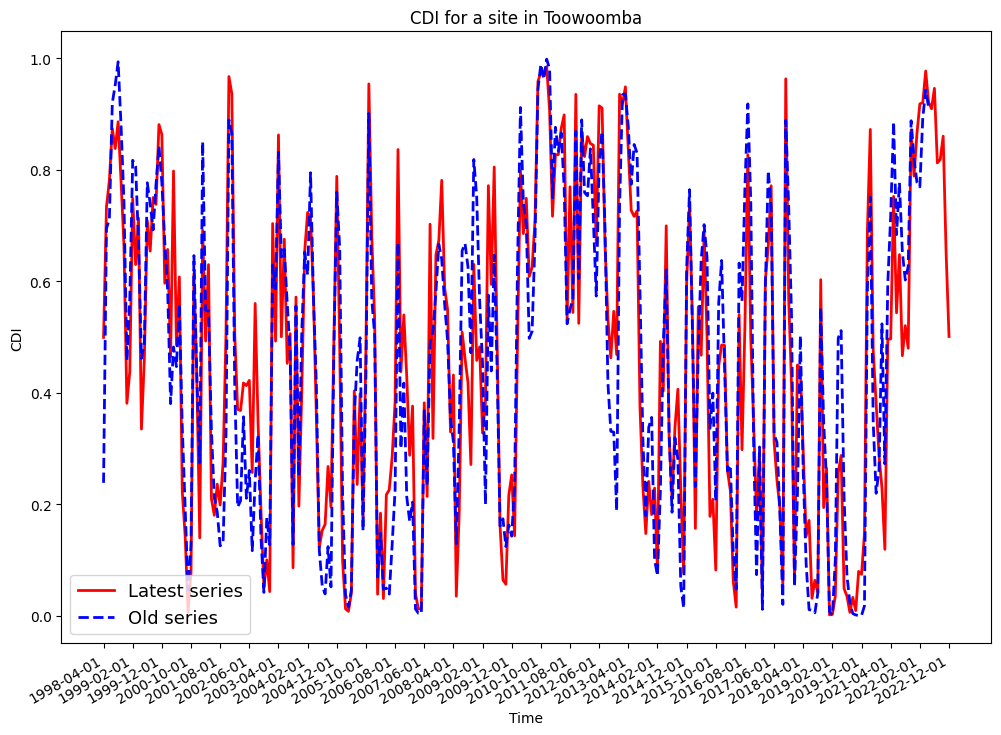

In [23]:
fig = plt.figure()
#fig, ax = plt.subplots()
plt.plot(time_of_data, cdis, c = 'r', linewidth=2)
plt.plot(time_of_data[0:284], pd.array(dfO.iloc[:, 1]), '--', c = 'b', linewidth=2) 
plt.xticks(np.arange(0,291,10), time_of_data[0:291:10])
plt.legend(['Latest series', 'Old series'], fontsize=13)
#xticks = np.arange(0,280,20)
#xticklabels = time_of_data[0:280:20]
#ax.set_xticks(xticklabels)
#ax.set_xticks(x, labels)
plt.xlabel("Time")
plt.ylabel("CDI")
plt.title("CDI for a site in Toowoomba") 
fig.autofmt_xdate()
fig.set_size_inches(12,9)
#fig.savefig('toowoomba.tiff', dpi = 200)
locs, labels = plt.xticks()
print(locs)
print(labels)